# Messy Vs Clean Room Classification

In this notebook I am going to solve the Messy Room vs Clean Room Classification problem.

So, the backdrop of the problem is quite funny, since, I am a messy person and somewhat leave my room messy and when I saw this problem I was like woo lets do this.

So thats why I started.

For this problem, I am going to use the VGG16 model of keras, even though it might be a very big one for the purpose of our dataset which is a mere 192 images long.

So lets go on and get set with our model.

First its always better to import all the packages I will be needing for this project. I have a practise of importing all the packages in the first cell, so lets do that.

In [1]:
#Importing the necessary packages

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
import os

With the imports out of the way. Lets start our project by importing our dataset.

I have already downloaded it in my local drive and its formatted just like the one is necessary for <code>ImageDataGenerator</code>.

So lets begin.

## Step 1: Importing the Dataset

In [2]:
#Setting the base direction

base = 'D:/Deep_Learning/MessyVsCleanRoom/images'

#Setting the train directory as a variable

train_dir = os.path.join(base , 'train')

#Setting the validation directory

val_dir = os.path.join(base , 'val')

#Setting the test directory

test_dir = os.path.join(base , 'test')

Now as I have already mentioned the Dataset is already organised to be fed into ImageDataGenerator. So, lets process it and start digging in.

## Step 2: Data Processing

We are going to process the data, but lets first visualize one of the examples.

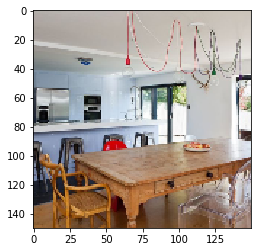

In [3]:
#first lets visualize one of the images

img_path = os.path.join(train_dir , 'clean/1.png') #defining the image path

our_image = image.load_img(img_path , target_size = (150 , 150)) #loading the image

plt.imshow(our_image) #displaying the image
plt.show()

Now its time that we create the generators.

In [44]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True) #generator of training images
val_datagen = ImageDataGenerator(rescale = 1./255) #generator of validation images

train_gen = train_datagen.flow_from_directory(train_dir,
                                              class_mode = 'binary',
                                              batch_size = 16,
                                              target_size = (150 , 150)
                                              )
val_gen = train_datagen.flow_from_directory(val_dir,
                                            class_mode = 'binary',
                                            batch_size = 5,
                                            target_size = (150 , 150)
                                            )

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


Now, with all the generators sorted and the data ready, lets model this.

## Step 3: Modeling

For this project we are going to use the pretrained VGG16 model and thereafter use:
1. Flatten Layer
2. Dense Layer with 64 units and relu activation
3. Output Layer with sigmoid activation

In [45]:
#Defining the VGG16 model as the base of our model
conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (150 , 150 , 3))

Now lets setup our model with the VGG16 model and then freeze the VGG16 part of the model before training.

In [46]:
model = Sequential() #Defining the object
model.add(conv_base) #Adding the VGG16 base
model.add(Flatten())
model.add(Dense(64 , activation = 'relu')) #Adding the Dense layers on top
Dropout(0.5)
model.add(Dense(1 , activation = 'sigmoid')) #Final output layer

Lets check the summary of the model.

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                524352    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 15,239,105
Trainable params: 15,239,105
Non-trainable params: 0
_________________________________________________________________


In [48]:
conv_base.trainable = False #Setting the VGG 

Now everything out of the way, lets set our compilation feature.

In [49]:
model.compile(optimizer =  'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']) #setting the compile object

With everything set, its time to train our model.

In [50]:
history = model.fit_generator(train_gen,
                    steps_per_epoch = 16,
                    epochs = 20,
                    validation_data = val_gen,
                    validation_steps = 5)

Epoch 1/20
16/16 [==============================] - 6s 367ms/step - loss: 0.4894 - accuracy: 0.7617 - val_loss: 0.3152 - val_accuracy: 0.8400
Epoch 2/20
16/16 [==============================] - 6s 359ms/step - loss: 0.1943 - accuracy: 0.9336 - val_loss: 0.1054 - val_accuracy: 0.9600
Epoch 3/20
16/16 [==============================] - 6s 359ms/step - loss: 0.2061 - accuracy: 0.9141 - val_loss: 0.0796 - val_accuracy: 0.9600
Epoch 4/20
16/16 [==============================] - 6s 360ms/step - loss: 0.2032 - accuracy: 0.9180 - val_loss: 0.1980 - val_accuracy: 0.9200
Epoch 5/20
16/16 [==============================] - 6s 360ms/step - loss: 0.1380 - accuracy: 0.9531 - val_loss: 0.3809 - val_accuracy: 0.8800
Epoch 6/20
16/16 [==============================] - 6s 360ms/step - loss: 0.2996 - accuracy: 0.8750 - val_loss: 0.0639 - val_accuracy: 1.0000
Epoch 7/20
16/16 [==============================] - 6s 360ms/step - loss: 0.1842 - accuracy: 0.9180 - val_loss: 0.1594 - val_accuracy: 0.9200
Epoch 

In [51]:
df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.489435,0.761719,0.315156,0.84
1,0.194295,0.933594,0.105393,0.96
2,0.206081,0.914062,0.079574,0.96
3,0.203152,0.917969,0.198043,0.92
4,0.138025,0.953125,0.380906,0.88


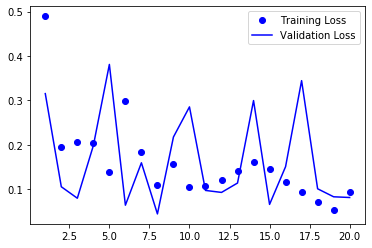

In [52]:
#Plotting the loss curve

loss = df["loss"]
val_loss = df["val_loss"]
epochs = range(1 , len(loss) + 1)

plt.plot(epochs , loss , 'bo' , label = 'Training Loss')
plt.plot(epochs , val_loss , 'b' , label = 'Validation Loss')
plt.legend()

plt.show()

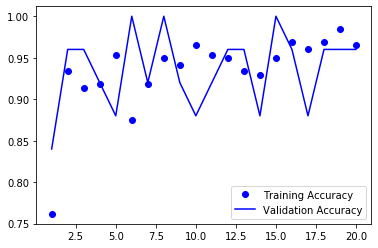

In [53]:
#Plotting the Accuacy Curve

acc = df["accuracy"]
val_acc = df["val_accuracy"]
epochs = range(1 , len(loss) + 1)

plt.plot(epochs , acc , 'bo' , label = 'Training Accuracy')
plt.plot(epochs , val_acc , 'b' , label = 'Validation Accuracy')
plt.legend()

plt.show()

Wow! Thats awesome we achieved more than 95% in both the training and validation set. Lets see for the predictions.

In [54]:
test_datagen = ImageDataGenerator(1./255)

test_gen = test_datagen.flow_from_directory(test_dir,
                                            class_mode = 'binary',
                                            batch_size = 9,
                                            target_size = (150 , 150),
                                            shuffle = False)

Found 10 images belonging to 1 classes.


In [56]:
test_gen.reset()

predictions = model.predict_generator(test_gen , steps = 1)

In [57]:
predictions

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)

The class is [1.]


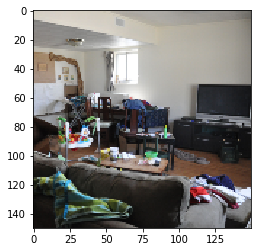

In [61]:
img_path = os.path.join(test_dir , 'all_classes/5.png') #defining the image path

our_image = image.load_img(img_path , target_size = (150 , 150)) #loading the image
print('The class is', predictions[5])
plt.imshow(our_image) #displaying the image
plt.show()